In [1]:
from bs4 import BeautifulSoup
import requests
url1='http://dtemaharashtra.gov.in/frmInstituteList.aspx?RegionID=3&RegionName=Mumbai'
url2='http://dtemaharashtra.gov.in/frmInstituteList.aspx?RegionID=6&RegionName=Pune'
url3='http://dtemaharashtra.gov.in/frmInstituteList.aspx?RegionID=1&RegionName=Amravati'
url4='http://dtemaharashtra.gov.in/frmInstituteList.aspx?RegionID=2&RegionName=Aurangabad'
lst=[url1,url2,url3,url4]
link=[]
for urls in lst:
    
    html_content = requests.get(urls).text
    soup = BeautifulSoup(html_content, "lxml")
    t= soup.find("table", attrs={"class": "DataGrid"})
    #print(t.prettify())
    tags=t('a')
    for tag in tags:
        link.append(tag.get('href'))
links=list(filter(None,link))


In [2]:
print(len(links))

1222


In [4]:
region,name,address,officeno,personalno,emailid,website,dir_pri,reg,status,auto,mino=([] for i in range(12))
for link in links:
    b='http://www.dtemaharashtra.gov.in/'
    c=b+link
    html=requests.get(c).text
    soup = BeautifulSoup(html, "lxml")
    r=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblRegion"}).text
    region.append(r)
    n=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblInstituteNameEnglish"}).text
    name.append(n)
    add=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblAddressEnglish"}).text
    address.append(add)
    offno=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblOfficePhoneNo"}).text
    pos=offno.find('E')
    offno=offno[:pos]
    officeno.append(offno)
    perno=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblPersonalPhoneNo"}).text[:-7]
    pos1=perno.find('E')
    offno=perno[:pos1]
    personalno.append(perno)
    email=soup.find('span', attrs={"id":"ctl00_ContentPlaceHolder1_lblEMailAddress"}).text
    emailid.append(email)
    webadd=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblWebAddress"}).text
    website.append(webadd)
    dipi=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblPrincipalNameEnglish"}).text
    dir_pri.append(dipi)
    regname=soup.find('span', attrs={"id":"ctl00_ContentPlaceHolder1_lblRegistrarNameEnglish"}).text
    reg.append(regname)
    stat=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblStatus1"}).text
    status.append(stat)
    aut_stat=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblStatus2"}).text
    auto.append(aut_stat)
    min_stat=soup.find('span',attrs={"id":"ctl00_ContentPlaceHolder1_lblStatus3"}).text
    mino.append(min_stat)
print("data extracted")

end


In [13]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [14]:
import pandas as pd
import numpy as np
df=pd.DataFrame(list(zip(region,name,address,officeno,personalno,emailid,website,dir_pri,reg,status,auto,mino)), columns=["Region","College Name","Address","Office Number","Personal Number","Email-id","Website Link","Director/Principal Name","Registrar Name","Status","Autonomous Status","Minority Status"])
df = df.apply(lambda x: x.str.strip()).replace('', None)
df['Contact for placement/ TPO contact']=None
df['Email for placement/TPO email']=None

df

,Region,College Name,Address,Office Number,Personal Number,Email-id,Website Link,Director/Principal Name,Registrar Name,Status,Autonomous Status,Minority Status,Contact for placement/ TPO contact,Email for placement/TPO email
0,Mumbai,Jamnalal Bajaj Institute of Management Studies...,"Dadabhai Navroji House, 164, Backbay Reclamati...",22747700,22024052,director@jbims.edu,www.jbims.edu,Dr. Kavita Laghate,Dr. Ajay Deshmukh,University Department,Non-Autonomous,Non-Minority,None,None
1,Mumbai,Sydenham Institute of Management Studies & Res...,"B-Road, Churchgate, Mumbai 400020",61510701,61510700,director@simsree.net,www.simsree.org,DR.M.B.Bhide,Farooque T.Peerzada,Government,Non-Autonomous,Non-Minority,None,None
2,Mumbai,Alkesh Dinesh Modi Institute for Financial & M...,"Joravar Bhavan,opp.new boys hostel, mumbai uni...",26521680,65903680,director@admi.mu.ac.in,www.mu.ac.in,Dr Smita Shukla,Dr Smita Shukla,University Department,Non-Autonomous,Non-Minority,None,None
3,Mumbai,Jankidevi Bajaj Institute of Management Studie...,"Sir Vithaldas Thackersey Vidya Vihar, Juhu Roa...",26606626,26606607,jdbims@sndt.ac.in,www.jdbims.net,Dr. Meera Shanker,Dr. Deepak Govind Deshpande,University Managed,Non-Autonomous,Non-Minority,None,None
4,Mumbai,"Government College of Pharmacy, Ratnagiri","Government Polytechnic Campus, Near Thiba Pala...",221201,26606607,bpharmratnagiri@gmail.com,www.gcopratnagiri.com,Dr. Rajendra Panditrao Marathe,Smt. Kumud Uday Purohit,Government,Non-Autonomous,Non-Minority,None,None
5,Mumbai,"Government Institute of Printing Technology, M...","J.J School Of Architecture Compound, Near Cst ...",20821474,26606607,gipt_m@rediffmail.com,www.gipt.ac.in,MRS. M.S.DESHPANDE,Mrs. Maya Waghmare,Government,Autonomous,Non-Minority,None,None
6,Mumbai,"Government Polytechnic, Mumbai","49, Ali Yawar Jung Marg, Kherwadi, Bandra(E), ...",26474780,26606607,"principal@gpmumbai.ac.in,gpmumbai@gpmumbai.ac.in",www.gpmumbai.ac.in,Swati D Deshpande,Swati D Deshpande,Government,Autonomous,Non-Minority,None,None
7,Mumbai,"Government Polytechnic, Pen","At Post Ramwadi, Tal.Pen, Dist.Raigad. Raigad ...",9405691405,9405691405,governmentpolytechnicpen@rediffmail.com,www.gppen.ac.in,Dr. Sunil Sukhdeo Bhamre,Mrs. Sangita Chavan,Government,Non-Autonomous,Non-Minority,None,None
8,Mumbai,"Government Polytechnic, Ratnagiri","Near Thiba Palace, Ratnagiri , 415612",222435,222203,office.gpratnagiri@dtemaharashtra.gov.in,www.gpratnagiri.org,SHRI. A. M. JADHAV,Shri. K. G. Narvekar,Government,Non-Autonomous,Non-Minority,None,None
9,Mumbai,"Government Polytechnic, Malvan","A/P Kumbharmath, Malvan, Sindhudurg , 416606",252223,251371,gpmalvan3010@gmail.com,www.gpmalvan.co.in,Dr. Suresh A. Patil,Mr. B. R. Ayare,Government,Non-Autonomous,Non-Minority,None,None


In [19]:
import requests
import re
for i in range(len(website)):
    a=website[i]
    b='https://' 
    url=b+a
    pdata=[]
    emails=[]
    if(region[i]=='Mumbai'):
        try:
            req = requests.get(url).text
            pdata=re.findall("[Phone:]?([(]?[0][2][2][)/s-]?\d{4}[/s-]?\d{4})",req)
            if(pdata==[]):
                pdata = re.findall("[Phone:]?([(]?[0][2][3][0-9][0-9][)/s-]?\d{3}[/s-]?\d{3})", req)
            if(pdata==[]):
                pdata = re.findall("[Phone:]?([(]?[0][2][5][0-9][0-9][)/s-]?\d{3}[/s-]?\d{3})", req)
            if(pdata==[]):
                pdata = re.findall("[Phone:]?([(]?[0][2][1][0-9][0-9][)/s-]?\d{3}[/s-]?\d{3})", req)
            if(pdata==[]):
                pdata = re.findall("\d{5} \d{5}", req)
            if(pdata==[]):
                pdata=re.findall("[PhoneM:(]?([+][9][1][/s-]?\d{10})",req)
            if(pdata==[]):
                pdata=re.findall("[7-9]{1}[0-9]{9}",req)
            if(pdata==[]):
                pdata=re.findall("\d{3} \d{8}", req)
                
            emails=re.findall("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)",req)
            
            if(url=='https://www.imcost.edu.in'):
                pdata=['022 25832452','25829318' ,' 25832466','9820816932','7045944373']
            if(url=='https://www.fcrims.com'):
                pdata=['022-27771000']
            if(url=='https://www.mpcoa.in'):
                pdata=['+9122 20847229', '+91 9819-595-861']
            if(url=='https://www.timscdrmumbai.in'):
                pdata=['022 - 2884 0484/91','022 - 67308301/02']
                emails=['timscdr@thakureducation.org']
            if(url=='https://www.sce.edu.in'):
                pdata=['(022) 27743703','27743704','27743705','27743706','27743707','27743708','9320299474']
                emails=['registrarsaraswati@gmail.com']
            pdata = list(dict.fromkeys(pdata))
            emails = list(dict.fromkeys(emails))
        except:
            pass
        
    elif(region[i]=='Pune'):
        try:
            req = requests.get(url).text
            pdata=re.findall("[Phone:(]?([0][2][3][0-9][0-9][)/s-]?\d{6})",req)
            if(pdata==[]):
                pdata = re.findall("[Phone:(]?([0][2][0][)/s-]?\d{4}[/s-]?\d{4})", req)
            if(pdata==[]):
                pdata = re.findall("[Phone:(]?([0][2][0][)/s-]?\d{4}[/s-]?\d{4}.\d{4})", req)
            if(pdata==[]):
                pdata=re.findall("[Phone:(]?([0][2][1][0-9][0-9][)/s-]?\d{6})",req)
            if(pdata==[]):
                pdata=re.findall("[PhoneM:(]?([+][9][1][/s-]?[0-9]{10})",req)
            if(pdata==[]):
                pdata=re.findall("\d{3} \d{8}", req)
            pdata = list(dict.fromkeys(pdata))
            emails=re.findall("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)",req)
            emails = list(dict.fromkeys(emails))
        except:
            pass
    elif(region[i]=='Amravati'):
        try:
            req = requests.get(url).text 
            pdata=re.findall("[Phone:]?([(]?[0][7][2][0-9][0-9][)\s-]?\d{6})",req)
            if (pdata==[]):
                pdata=re.findall("[Phone:]?([(]?{1}[0][7][0-9][0-9][)\s-]?\d{7})",req)
            if (pdata==[]):
                pdata=re.findall("[+][9][1].[0-9]{10}",req)
            pdata = list(dict.fromkeys(pdata))
            emails=re.findall("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)",req)
            emails = list(dict.fromkeys(emails))
        except:
            pass
    elif(region[i]=='Aurangabad'):
        try:
            req = requests.get(url).text 
            pdata=re.findall("[Phone:]?([(]?[0][2][4][0][)/s-]?\d{7})",req)
            if(pdata==[]):
                pdata=re.findall("[Phone:]?([(]?[0][2][4][0-9][0-9][)/s-]?\d{3}[/s-]?\d{3})",req)
            if (pdata==[]):
                pdata=re.findall("[Phone:]?([(]?[0][2][3][8][0-9][)/s-]?\d{3}[/s-]?\d{3})",req)
            if (pdata==[]):
                pdata=re.findall("[PhoneM:]?([(]?[+][9][1][)/s-]?\d{5}[/s-]?\d{5})",req)
            if(pdata==[]):
                pdata=re.findall("[Phone:]?([(]?[0][)/s-]?[7]\d{4}[/s-]?\d{5})",req)
            pdata = list(dict.fromkeys(pdata))
            emails=re.findall("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)",req)
            emails = list(dict.fromkeys(emails))
            if (url=='https://www.svspm.org'):
                pdata=[]
                emails=['svspmindia@gmail.com']
        except:
            pass
        
    df.loc[i,'Contact for placement/ TPO contact']=pdata
    df.loc[i,'Email for placement/TPO email']=emails
    
for i in range(len(website)):
    if df.loc[i,'Contact for placement/ TPO contact']==[]:
        df.loc[i,'Contact for placement/ TPO contact']=None
    if df.loc[i,'Email for placement/TPO email']==[]:
        df.loc[i,'Email for placement/TPO email']=None
print("Phone number and emails from websites extracted")

Phone number and emails from websites extracted


In [128]:
df

,Region,College Name,Address,Office Number,Personal Number,Email-id,Website Link,Director/Principal Name,Registrar Name,Status,Autonomous Status,Minority Status,Contact for placement/ TPO contact,Email for placement/TPO email
0,Mumbai,Jamnalal Bajaj Institute of Management Studies...,"Dadabhai Navroji House, 164, Backbay Reclamati...",22747700,22024052,director@jbims.edu,www.jbims.edu,Dr. Kavita Laghate,Dr. Ajay Deshmukh,University Department,Non-Autonomous,Non-Minority,"[99302 56739, 75064 31949, 95278 24499, 88054 ...","[info@jbims.edu, admin@jbims.edu, placements@j..."
1,Mumbai,Sydenham Institute of Management Studies & Res...,"B-Road, Churchgate, Mumbai 400020",61510701,61510700,director@simsree.net,www.simsree.org,DR.M.B.Bhide,Farooque T.Peerzada,Government,Non-Autonomous,Non-Minority,None,None
2,Mumbai,Alkesh Dinesh Modi Institute for Financial & M...,"Joravar Bhavan,opp.new boys hostel, mumbai uni...",26521680,65903680,director@admi.mu.ac.in,www.mu.ac.in,Dr Smita Shukla,Dr Smita Shukla,University Department,Non-Autonomous,Non-Minority,"[022-26526304, 022-26527963, 022-26526050]",None
3,Mumbai,Jankidevi Bajaj Institute of Management Studie...,"Sir Vithaldas Thackersey Vidya Vihar, Juhu Roa...",26606626,26606607,jdbims@sndt.ac.in,www.jdbims.net,Dr. Meera Shanker,Dr. Deepak Govind Deshpande,University Managed,Non-Autonomous,Non-Minority,None,None
4,Mumbai,"Government College of Pharmacy, Ratnagiri","Government Polytechnic Campus, Near Thiba Pala...",221201,26606607,bpharmratnagiri@gmail.com,www.gcopratnagiri.com,Dr. Rajendra Panditrao Marathe,Smt. Kumud Uday Purohit,Government,Non-Autonomous,Non-Minority,None,None
5,Mumbai,"Government Institute of Printing Technology, M...","J.J School Of Architecture Compound, Near Cst ...",20821474,26606607,gipt_m@rediffmail.com,www.gipt.ac.in,MRS. M.S.DESHPANDE,Mrs. Maya Waghmare,Government,Autonomous,Non-Minority,None,None
6,Mumbai,"Government Polytechnic, Mumbai","49, Ali Yawar Jung Marg, Kherwadi, Bandra(E), ...",26474780,26606607,"principal@gpmumbai.ac.in,gpmumbai@gpmumbai.ac.in",www.gpmumbai.ac.in,Swati D Deshpande,Swati D Deshpande,Government,Autonomous,Non-Minority,None,None
7,Mumbai,"Government Polytechnic, Pen","At Post Ramwadi, Tal.Pen, Dist.Raigad. Raigad ...",9405691405,9405691405,governmentpolytechnicpen@rediffmail.com,www.gppen.ac.in,Dr. Sunil Sukhdeo Bhamre,Mrs. Sangita Chavan,Government,Non-Autonomous,Non-Minority,None,None
8,Mumbai,"Government Polytechnic, Ratnagiri","Near Thiba Palace, Ratnagiri , 415612",222435,222203,office.gpratnagiri@dtemaharashtra.gov.in,www.gpratnagiri.org,SHRI. A. M. JADHAV,Shri. K. G. Narvekar,Government,Non-Autonomous,Non-Minority,None,None
9,Mumbai,"Government Polytechnic, Malvan","A/P Kumbharmath, Malvan, Sindhudurg , 416606",252223,251371,gpmalvan3010@gmail.com,www.gpmalvan.co.in,Dr. Suresh A. Patil,Mr. B. R. Ayare,Government,Non-Autonomous,Non-Minority,[02365252223],[gpmalvan3010@gmail.com]


In [120]:
x=list(df['Region'].unique())
a=[]
na=[]
t=[]
for r in x:
    count1=0
    count2=0
    for i in range (len(region)):
        if (df.loc[i,"Region"]==r):
            if(df.loc[i,"Autonomous Status"]=="Autonomous"):
                count1+=1
            else:
                count2+=1
    a.append(count1)
    na.append(count2)
for i in range(len(a)):
    t.append(a[i]+na[i])


<IPython.core.display.Javascript object>


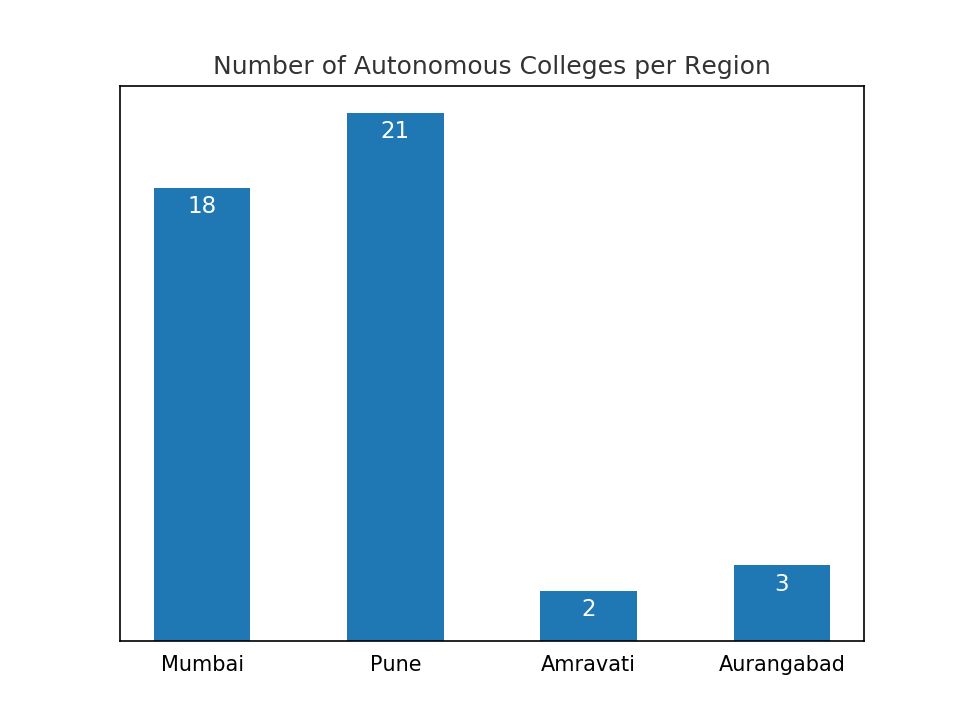

<IPython.core.display.Javascript object>


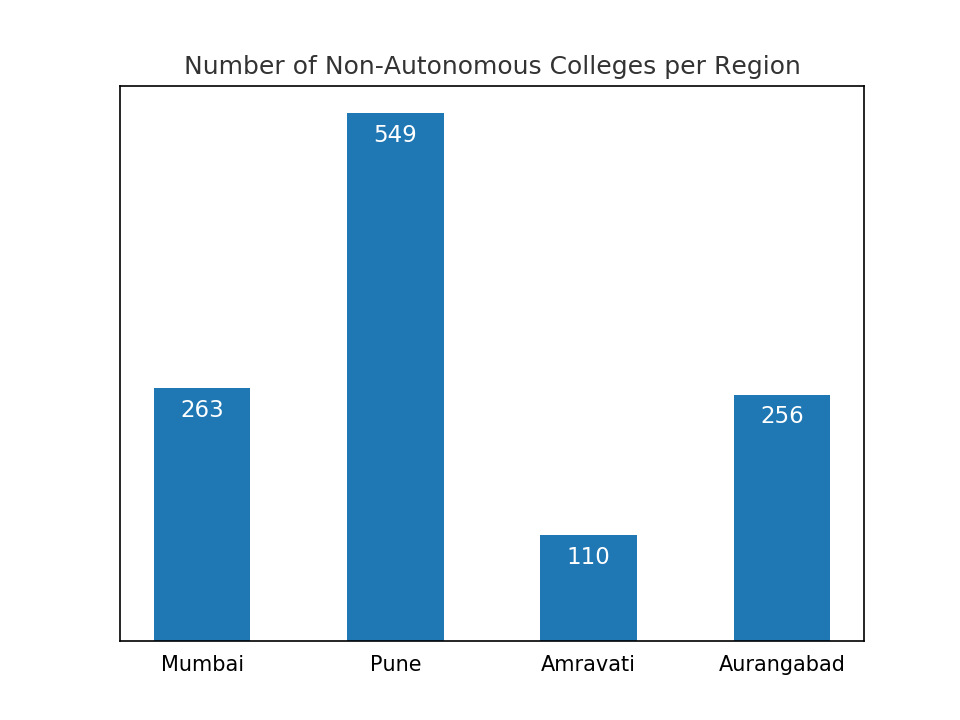

<IPython.core.display.Javascript object>


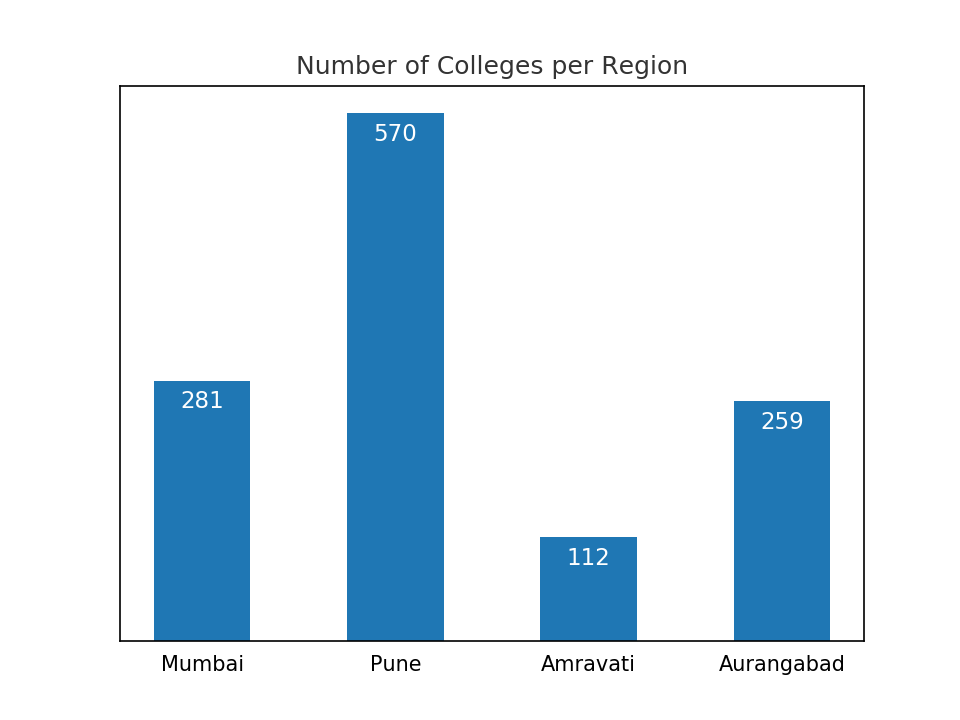

In [130]:
%matplotlib notebook
import matplotlib.pyplot as plt
index1=np.arange(len(x))
plt.figure()
bars=plt.bar(index1,a,width=0.5,align='center',linewidth=0,color='#1F77B4')
plt.xticks(index1,x)
plt.title('Number of Autonomous Colleges per Region', alpha=0.8)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-1, str(int(bar.get_height())), ha='center', color='w', fontsize=11)
plt.show()

plt.figure()
bars=plt.bar(index1,na,width=0.5,align='center',linewidth=0,color='#1F77B4')
plt.xticks(index1,x)
plt.title('Number of Non-Autonomous Colleges per Region', alpha=0.8)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-30, str(int(bar.get_height())), ha='center', color='w', fontsize=11)
plt.show()

plt.figure()
bars=plt.bar(index1,t,width=0.5,align='center',linewidth=0,color='#1F77B4')
plt.xticks(index1,x)
plt.title('Number of Colleges per Region', alpha=0.8)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-30, str(int(bar.get_height())), ha='center', color='w', fontsize=11)
plt.show()

In [129]:
df.to_csv("College_Information.csv")